In [9]:
import pandas as pd
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
tweet = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

In [3]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
type(tweet['text'])

pandas.core.series.Series

In [5]:
tweet.shape

(7613, 5)

In [6]:
tweet.info

<bound method DataFrame.info of          id keyword location  \
0         1     NaN      NaN   
1         4     NaN      NaN   
2         5     NaN      NaN   
3         6     NaN      NaN   
4         7     NaN      NaN   
...     ...     ...      ...   
7608  10869     NaN      NaN   
7609  10870     NaN      NaN   
7610  10871     NaN      NaN   
7611  10872     NaN      NaN   
7612  10873     NaN      NaN   

                                                   text  target  
0     Our Deeds are the Reason of this #earthquake M...       1  
1                Forest fire near La Ronge Sask. Canada       1  
2     All residents asked to 'shelter in place' are ...       1  
3     13,000 people receive #wildfires evacuation or...       1  
4     Just got sent this photo from Ruby #Alaska as ...       1  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...

In [1]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\sarthak\appdata\local\temp\pip-req-build-o2d9_scv
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7683 sha256=972247298e74f0a0f53a846f1127d6141d290ea5027b463ef1997ef0e272d07e
  Stored in directory: C:\Users\SARTHAK\AppData\Local\Temp\pip-ephem-wheel-cache-xwnljvxm\wheels\fd\71\47\e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie


In [6]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install textblob==0.15.3

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install spacy==2.2.4

  Using cached spacy-2.2.4-cp38-cp38-win_amd64.whl (10.1 MB)
  Using cached catalogue-1.0.0-py2.py3-none-any.whl (7.7 kB)
  Using cached thinc-7.4.0-cp38-cp38-win_amd64.whl (2.1 MB)
  Using cached srsly-1.0.5-cp38-cp38-win_amd64.whl (178 kB)
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.1
    Uninstalling srsly-2.4.1:
      Successfully uninstalled srsly-2.4.1
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.10
    Uninstalling thinc-8.0.10:
      Successfully uninstalled thinc-8.0.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.1.3
    Uninstalling spacy-3.1.3:
      Successfully uninstalled spacy-3.1.3
Note: you may need to restart the kernel to use updated packages.


In [11]:
import preprocess_kgptalkie as kgp

In [12]:
tweet = kgp.get_basic_features(tweet)

In [6]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='char_counts', ylabel='Density'>

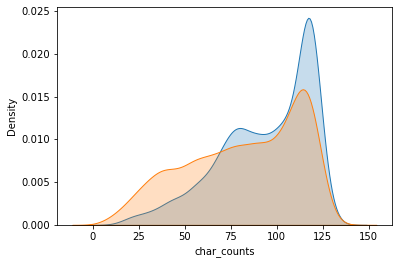

In [15]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True)
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True)

In [8]:
freqs = kgp.get_word_freqs(tweet, 'text')

In [29]:
freqs

the            3268
a              2183
in             1979
to             1946
of             1832
               ... 
beltmister        1
grahamwp          1
gpv               1
unuclear          1
longaberger       1
Length: 18112, dtype: int64

In [7]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [13]:
tweet['text']=tweet['text'].apply(lambda x:get_clean(x))

In [10]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [19]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)

In [20]:
bigram

[('zxathetis are', 60257),
 ('zurich for', 60256),
 ('zumiez is', 60255),
 ('zss vs', 60254),
 ('zourryart forgot', 60253),
 ('zouma just', 60252),
 ('zouma has', 60251),
 ('zotar50 skeleton', 60250),
 ('zoom in', 60249),
 ('zonewolf123 liked', 60248),
 ('zonesthank god', 60247),
 ('zones donuat', 60246),
 ('zone with', 60245),
 ('zone what', 60244),
 ('zone war', 60243),
 ('zone they', 60242),
 ('zone protectdenaliwolves', 60241),
 ('zone outside', 60240),
 ('zone of', 60239),
 ('zone my', 60238),
 ('zone littlewomenla', 60237),
 ('zone laugh', 60236),
 ('zone johnny', 60235),
 ('zone in', 60234),
 ('zone during', 60233),
 ('zone common', 60232),
 ('zone coming', 60231),
 ('zone but', 60230),
 ('zone and', 60229),
 ('zone amirite', 60228),
 ('zombies take', 60227),
 ('zombie fun', 60226),
 ('zombie feel', 60225),
 ('zombie apocalypse', 60224),
 ('zomatoaus lovefood', 60223),
 ('zojadelin you', 60222),
 ('zodiac girl', 60221),
 ('zippoline as', 60220),
 ('zippers bags', 60219),
 ('zipp

In [11]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'the in of a to and is on for i at by from it that with not after this fire are was as you have my news over up more via an were disaster be people california suicide has no police who when but been killed do like will just so than hiroshima out fires crash storm families train we about into now emergency buildings your bomb 2 all two there mh370 what nuclear am video they wildfire attack get accident bombing new one northern how prime burning minister legionnaires dead me bomber if homes some car war atomic still fatal obama he years off us collapse may debris watch forest city retweet first japan malaysia or latest mass water man severe near today had confirmed those earthquake before would found oil spill army floods down warning 70 world under derailment wreckage outbreak injured home evacuation could weather being thunderstorm migrants saudi 40 our old s u flood say investigators during missing flooding can their bridge time mosque her 3 back death suspect state charged wounded ki

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
from wordcloud import WordCloud

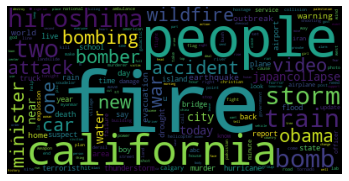

In [36]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

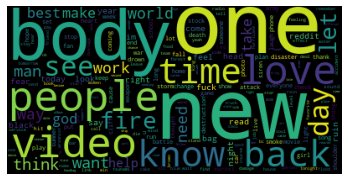

In [38]:
nreal = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
nreal = ' '.join(nreal.index)
word_cloud = WordCloud(max_font_size=100).generate(nreal)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [14]:
text = tweet['text']
y = tweet['target']

In [15]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [12]:
X.shape

(7613, 18077)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [17]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)

  print()
  print('Classification Report')
  print(classification_report(y_test, y_pred))

In [22]:
from sklearn.svm import LinearSVC

In [24]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       869
           1       0.81      0.69      0.75       654

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [18]:
x = 'there is fire in the forest'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

there is fire in the forest [1]


In [29]:
x = 'I dont believe in accidents there are only encounters in history'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

i dont believe in accidents there are only encounters in history [0]


In [20]:
x = 'trump threatned with nuclear war'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

trump threatned with nuclear war [1]


In [21]:
x = 'government has recently started registration for covid-19 vaccine'
x = get_clean(x)
print(x, clf.predict(tfidf.transform([x])))

government has recently started registration for covid19 vaccine [0]


In [1]:
pip install tweepy==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [24]:
import tweepy
from tweepy.streaming import StreamListener
from tweepy import Stream
import json

class MyListener(StreamListener):
    
    def __init__(self,api=None):
        super(MyListener, self).__init__()
        self.num_tweets = 0
        self.tweets = []

    def on_data(self, data):
        self.num_tweets += 1
        tweet = json.loads(data)
        self.tweets.append(tweet['text'])
        if self.num_tweets > 10:
            return False
        return True

    def on_error(self, status_code):
        if status_code == 420:
            return False

if __name__ == "__main__":
    
    API_KEY = "DeVlcV6mX6G3a5V6zCEAyN9Rd"
    API_SECRET_KEY = "yZlaD8NE7WwN3ouBYqUPmpbgpyQJi1NshLFgUgI9zLgsZZUMIH"
    ACCESS_TOKEN = "750546109676851201-PBlklH29YWYBMgqG4VuL0SNjLTYPyol"
    ACCESS_TOKEN_SECRET = "qTamBVnDRIQJDHttbejdadmTo3OurvroY4RGToBinHvf6"
    listener = MyListener()
    auth = tweepy.OAuthHandler(API_KEY, API_SECRET_KEY)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    myStream = tweepy.Stream(auth = auth, listener=listener,tweet_mode="extended")
    myStream.filter(track=['Mumbai','fire'], languages=['en'])
    tweet_list = listener.tweets

In [2]:
tweet_list

['RT @The_Real_Fly: Former New York Jets running back Zac Stacy \nhttps://t.co/2yo0KnFV2K',
 "Couldn't even watch to the end. What an animal. And she's prolly used to it. Didn't even scream or do nothing. My G… https://t.co/jGNYYovJMV",
 'RT @nastyfelon: they must be getting chased by rats then',
 'RT @nastyfelon: they must be getting chased by rats then']

In [18]:
for t in tweet_list:
    t = get_clean(t)
    print(t, clf.predict(tfidf.transform([t])))

retweet gagadaily london milan new york lady gaga does not disappoint houseofgucci [0]
retweet glossyera yall should support legacy new york city [1]
im ready to leave to new york next year [0]
retweet saylor thestalwart if we wish to build something that will be beautiful functional for a century we need to build it with solid ma [0]


In [4]:
import pickle

In [ ]:
with open('svc.pkl', 'wb') as f:
    pickle.dump(clf, f)

In [5]:
with open('svc.pkl', 'rb') as f:
    clf = pickle.load(f)

In [26]:
for t in tweet_list:
    t = get_clean(t)
    print(t, clf.predict(tfidf.transform([t])))

retweet photoboisim fire [1]
retweet cuffinten hold on [0]
retweet nctcharts possible tracklist for nct 3rd album universenct dream parachute la lanct 127 no to thatwayv zoomnct fire [0]
i do not care about the bruddah or the frustration he is heading to that mashup is fire and i need it like mad [0]
retweet pedi kween have yall heard that hms ssa and mettlestate have partnered to give us huawei free fire show an amazing competition fo [0]
retweet jechalmers new numbers out today show real wages have gone backwards while costs of living have skyrocketed and working families are f [0]
retweet aj yochi nct dream parachute la lanct 127 no to thatwayv zoom original versionnct fire bombnc [0]
retweet jaeedimples nct my guys crack the codenct oknct still got younct swimminnct fire bomb nct clear it outnct dream [0]
retweet eyeyesathylee clear it out nctfire bomb nctmy guys crack the code nctok nctparachute lala nct dre [0]
retweet indiaweatherman again today region south east of mumbai thund

In [25]:
tweet_list

['RT @PhotoBoiSim: fire',
 'RT @CuffinTen: HOLD ON https://t.co/bws3YAk5El',
 'RT @nctcharts_: possible tracklist for NCT 3rd Album "Universe"\n\nNCT Dream - Parachute (La La)\nNCT 127 - No To That\nWayV - Zoom\nNCT - Fire…',
 "I don't care about the bruddah or the frustration he's heading to.. that mashup is fire and I NEED it like maaaaad",
 "RT @Pedi_Kween: Have y'all heard that @HMS_SSA and @Mettlestate have partnered to give us Huawei free fire show?? An amazing competition fo…",
 'RT @JEChalmers: New numbers out today show real wages have gone backwards while costs of living have skyrocketed and working families are f…',
 'RT @aj_yochi: สรุปแล้วมีตามนี้ใช่มะ\nNCT Dream - PARACHUTE (LA LA)\nNCT 127 -\u200b NO TO THAT\nWAYV -\u200b ZOOM (ORIGINAL VERSION)\u200b\nNCT - FIRE BOMB\nNC…',
 'RT @jaeedimples: NCT - My guys (crack the code)\nNCT - OK!\nNCT - Still got you\nNCT - Swimmin\nNCT – Fire Bomb \nNCT – Clear It Out\nNCT Dream –…',
 'RT @EYEYESATHYLEE: สรุปตามนี้(ครบมั้ย)\nCLEAR I